In [1]:
import numpy as np
import scipy.spatial.distance as distance
from matplotlib import pylab
from sklearn.manifold import TSNE

%matplotlib inline

In [2]:
data = np.load('saves/embeddings_cbow.npy')

In [3]:
embeddings = data[()]['embeddings']
idx_to_game = data[()]['idx_to_game']
game_to_idx = data[()]['game_to_idx']

In [4]:
def closest(u, count=8):
    closest = []
    for idx, game in enumerate(idx_to_game):
        closest.append((idx, distance.cosine(u, embeddings[idx])))

    return [(idx_to_game[x[0]], x[1]) for x in sorted(closest, key=lambda t: t[1])][:count]

def closest_to_game(game, count=8):
    return closest(embeddings[game_to_idx[game]], count)

def game_distance(a, b):
    return distance.cosine(embeddings[game_to_idx[a]], embeddings[game_to_idx[b]])

In [5]:
num_points = 400

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000, metric='cosine')
two_d_embeddings = tsne.fit_transform(embeddings[1:num_points+1, :])

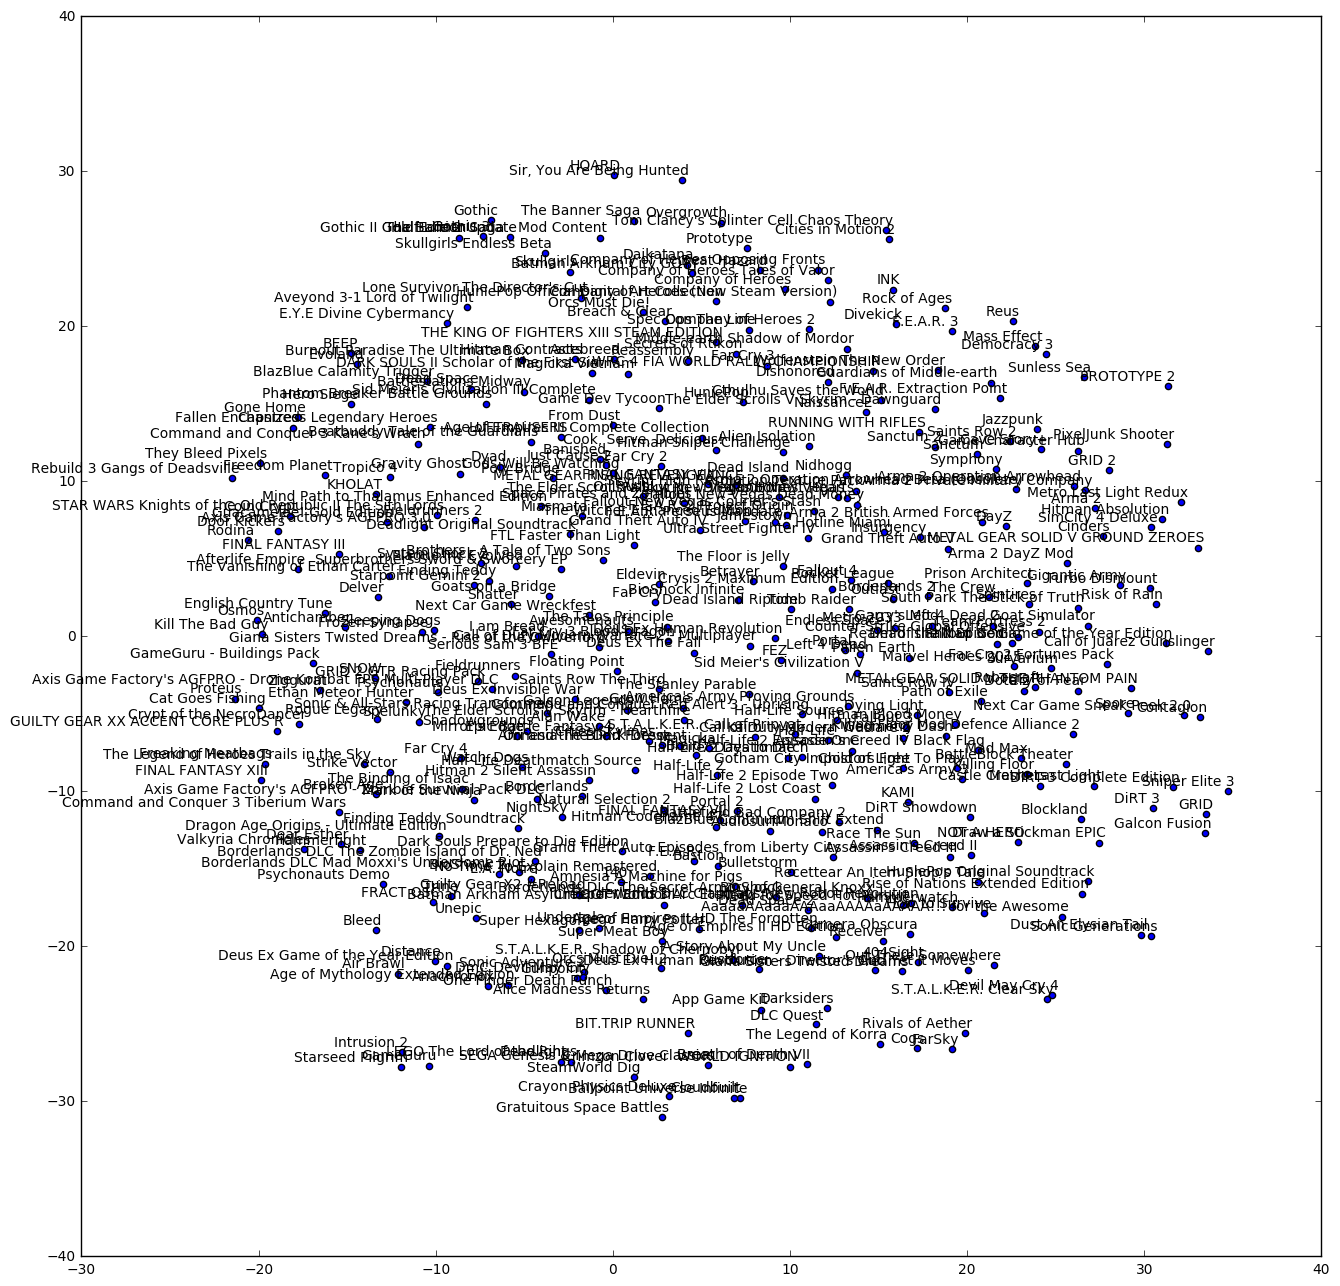

In [6]:
def plot(embeddings, labels):
  assert embeddings.shape[0] >= len(labels), 'More labels than embeddings'
  pylab.figure(figsize=(16, 16))  # in inches
  for i, label in enumerate(labels):
    x, y = embeddings[i, :]
    pylab.scatter(x, y)
    pylab.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points',
                   ha='right', va='bottom')
  pylab.show()

words = [idx_to_game[i] for i in range(1, num_points + 1)]
plot(two_d_embeddings, words)

In [7]:
print('Cosine: {}'.format(distance.cosine(embeddings[game_to_idx['Portal 2']], embeddings[game_to_idx['Portal']])))
print('Euclidean: {}'.format(distance.euclidean(embeddings[game_to_idx['Portal 2']], embeddings[game_to_idx['Portal']])))
print('Squared eucliedean: {}'.format(distance.sqeuclidean(embeddings[game_to_idx['Portal 2']], embeddings[game_to_idx['Portal']])))
print('Correlation: {}'.format(distance.correlation(embeddings[game_to_idx['Portal 2']], embeddings[game_to_idx['Portal']])))

Cosine: 0.6469368934631348
Euclidean: 1.1374857425689697
Squared eucliedean: 1.2938737869262695
Correlation: 0.6317599528507039


In [8]:
print('Cosine: {}'.format(distance.cosine(embeddings[game_to_idx['Portal 2']], embeddings[game_to_idx['Dota 2']])))
print('Euclidean: {}'.format(distance.euclidean(embeddings[game_to_idx['Portal 2']], embeddings[game_to_idx['Dota 2']])))
print('Squared eucliedean: {}'.format(distance.sqeuclidean(embeddings[game_to_idx['Portal 2']], embeddings[game_to_idx['Dota 2']])))
print('Correlation: {}'.format(distance.correlation(embeddings[game_to_idx['Portal 2']], embeddings[game_to_idx['Dota 2']])))

Cosine: 0.7446982568862133
Euclidean: 1.2204084396362305
Squared eucliedean: 1.4893966913223267
Correlation: 0.7352950908147108


In [9]:
closest_to_game('Counter-Strike Global Offensive', 8)

[('Counter-Strike Global Offensive', -1.1920928955078125e-07),
 ('Unturned', 0.34889352321624756),
 ('Team Fortress 2', 0.37201356887817383),
 ('APB Reloaded', 0.37845313549041748),
 ('Counter-Strike Nexon Zombies', 0.40039105410682507),
 ('Warframe', 0.40392912579427653),
 ('Counter-Strike Source', 0.41932594776153564),
 ('Counter-Strike', 0.42753219604492188)]

In [10]:
closest_to_game('Football Manager 2016', 16)

[('Football Manager 2016', 0.0),
 ('Football Manager 2011', 0.53972929242500156),
 ('Football Manager 2009', 0.58785681869306339),
 ('Rugby Challenge 2', 0.59156810145758376),
 ('Wildlife Park 2 - Crazy Zoo', 0.59975886939518863),
 ('Football Manager 2014', 0.60710789049957881),
 ('Frozen Free Fall Snowball Fight', 0.60732868313789368),
 ('Bierzerkers', 0.64056968688964844),
 ("King's Bounty Legions | Beast Master Pack", 0.64252952590760737),
 ('Crusader Kings II Hymns of Abraham', 0.64573407173156738),
 ('Football Manager 2012', 0.65637636184692383),
 ('Euro Truck Simulator 2 - Ice Cold Paint Jobs Pack', 0.6591070294380188),
 ('Rhythm Zone', 0.66149550676345825),
 ('Agarest - Fishy Pack 2 DLC', 0.6667981743812561),
 ('Galactic Civilizations III Soundtrack', 0.66736725957783949),
 ('Wildlife Park 2 - Fantasy', 0.67634535886915681)]

In [11]:
closest_to_game('Batman Arkham Asylum GOTY Edition')

[('Batman Arkham Asylum GOTY Edition', 0.0),
 ('Batman Arkham Origins -  Online Supply Drop 1', 0.58986715017957392),
 ('Age of Empires II HD Edition', 0.61541986465454102),
 ("A Druid's Duel", 0.61804422736167908),
 ('Team Fortress Classic', 0.61868882179260254),
 ('Captain Forever Remix', 0.6205309999305606),
 ('Half-Life Source', 0.6313807807706856),
 ('3DMark 11', 0.6315053403377533)]

In [12]:
game_distance('Grand Theft Auto V', 'Football Manager 2016')

0.91765463352203369

In [13]:
closest(embeddings[game_to_idx['Team Fortress 2']] - embeddings[game_to_idx['Counter-Strike']], 16)

[('Team Fortress 2', 0.53845437111365091),
 ('Killing Floor Beta', 0.67595735750860397),
 ('Agapan', 0.69465545073578316),
 ('Zombie Driver HD Apocalypse Pack', 0.71538377596549341),
 ('ACE - Arena Cyber Evolution', 0.71755622493849636),
 ('Children of the Nile Alexandria', 0.71789651253640174),
 ('Chainsaw Warrior Lords of the Night', 0.73230849906742623),
 ('Door Kickers', 0.73638917450640051),
 ('Space Engineers', 0.73789165411090019),
 ('NEOTOKYO', 0.74643518173014312),
 ('Soul Gambler Artbook & Soundtrack', 0.75399176077846441),
 ("Five Nights at Freddy's 4", 0.75422594406421806),
 ('Star Wars Dark Forces', 0.75808304115090819),
 ('Octodad Free Avatar', 0.75886773660319373),
 ('Gemini Rue', 0.75996473192511904),
 ('Pink Hour', 0.76341207322217186)]

In [14]:
closest(embeddings[game_to_idx['Counter-Strike']] - embeddings[game_to_idx['Team Fortress 2']], 16)

[('Counter-Strike', 0.53845450025505426),
 ('Medal of Honor(TM) Multiplayer', 0.69195733168032336),
 ('Pro Rugby Manager 2015', 0.72600594696162557),
 ('Poker Night at the Inventory', 0.7273356028841087),
 ('Aberoth', 0.73940901726302644),
 ('Crazy Machines 2', 0.74282890538356505),
 ('Grand Ages Rome', 0.74615468354833703),
 ('Dustoff Heli Rescue', 0.74729587694961896),
 ("Telltale Texas Hold'Em", 0.75407045632114889),
 ('MoW Face Off XL', 0.76568125318817837),
 ("Sid Meier's Civilization IV Colonization", 0.76769724964733943),
 ('Dwarfs!?', 0.7728474710884683),
 ('Smooth Operators', 0.77549015619652739),
 ('DuckTales Remastered', 0.77629440323753229),
 ('NAM', 0.77999347835912936),
 ('ShootMania Storm', 0.78160279999231963)]

In [15]:
closest(embeddings[game_to_idx['Dota 2']] - embeddings[game_to_idx['Counter-Strike']], 8)

[('Dota 2', 0.53021027230961448),
 ('Star Wars Dark Forces', 0.69639975830279077),
 ('Magic Duels', 0.71570356249633249),
 ('Abyss Odyssey', 0.71686022003327299),
 ('Transformice', 0.72161651807744254),
 ('Teenage Mutant Ninja Turtles Out of the Shadows', 0.73196463025620939),
 ('Zombie Driver HD Apocalypse Pack', 0.7324947941529576),
 ('The Treasures of Montezuma 4', 0.7348965252487295)]